# Demo 1: spectral parameterization (FOOOF) + simulation of neural data (neurodsp)
A more comprehensive set of tutorials here: https://fooof-tools.github.io/fooof/auto_tutorials/index.html

If using on Colab, need to run the next line to import the necessary packages

In [1]:
# !pip install fooof

In [2]:
ON_COLAB = False
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

cur_dir = 'https://raw.githubusercontent.com/rdgao/specparam-sbi/main/demo_notebooks/' if ON_COLAB else './'
plt.style.use(cur_dir + '/matplotlibrc_notebook.mplstyle')
# plt.style.use('./matplotlibrc_notebook.mplstyle')
# plt.style.use('./images/presentation.mplstyle')

### Generate some synthetic data
(if you are running on Colab)

In [3]:
# # generate data
# import fooof
# f_range = [1,500]
# f_res = 0.5
# ap_params = [1,100,3]
# osc_params = [30,1.5,6]
# noise_level = 0.05
# freqs, psd = fooof.sim.gen_power_spectrum(f_range, ap_params, osc_params, noise_level, f_res)
# plt.loglog(freqs, psd)
# np.savez('psd_example', freqs=freqs, psd=psd)

### Load the data: we just need a frequency axis and the power spectrum values to start.

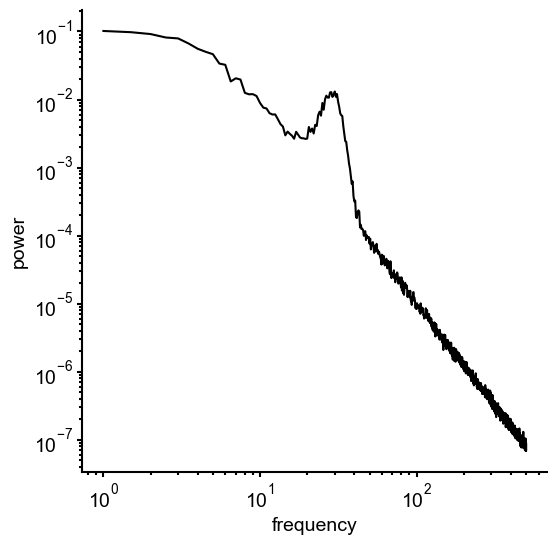

In [4]:
plt.figure(figsize=(6,6))
psd_data = np.load('psd_example.npz')
freqs, psd = psd_data['freqs'], psd_data['psd']
plt.loglog(freqs, psd)
plt.xlabel('frequency'); plt.ylabel('power');

---
# 1: 0 to FOOOFed in 3 lines of code

/var/folders/y5/v0p8674n5jz74s_6m3xq44k40000gn/T/ipykernel_71346/799722662.py:1: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterization) package.
This version of `fooof` (1.1) is fully functional, but will not be further updated.
New projects are recommended to update to using `specparam` (see Changelog for details).
  import fooof



FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  

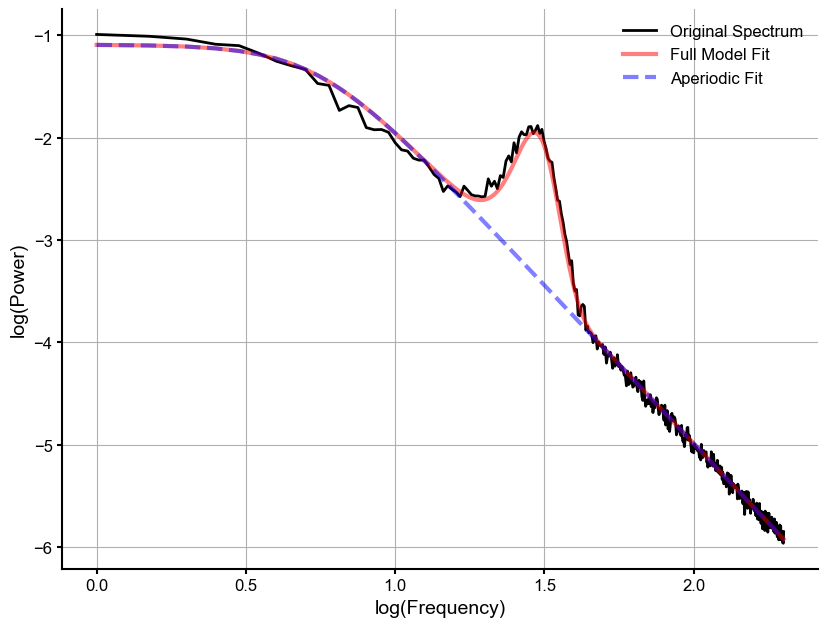

In [5]:
import fooof
fg = fooof.FOOOF(max_n_peaks=3, min_peak_height=.5, aperiodic_mode='knee')
fg.fit(freqs, psd, freq_range=[1,200])
fg.report(plt_log=True)

### A report is automatically produced to show the model fit, and various estimated parameters and errors.


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 200 Hz                        
                                 Frequency Resolution is 0.50 Hz                                  
                                                                                                  
                         Aperiodic Parameters (offset,

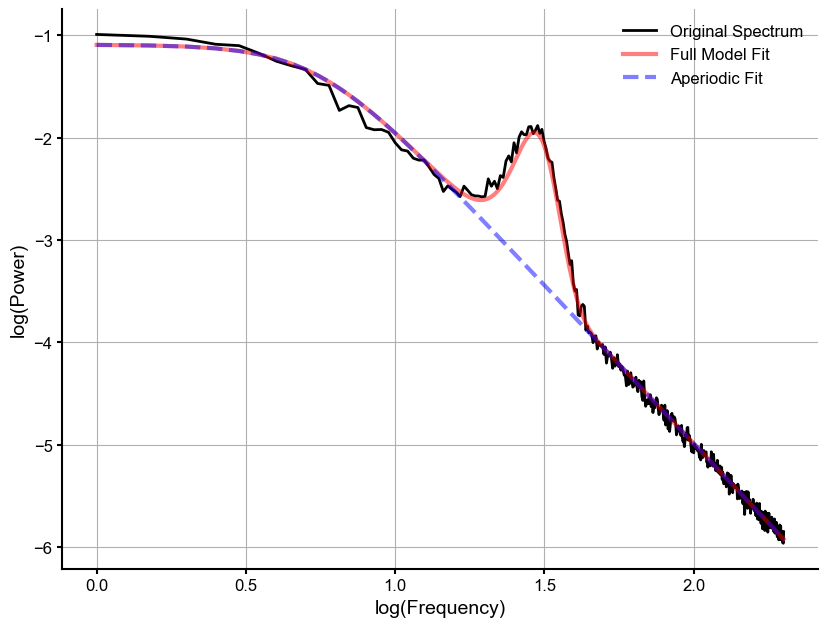

In [6]:
fg.report(plt_log=True)

In [7]:
fg.print_results()

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 200 Hz                        
                                 Frequency Resolution is 0.50 Hz                                  
                                                                                                  
                         Aperiodic Parameters (offset, knee, exponent):                           
                                     1.2011, 196.9880, 3.0944                                     
                                                                                                  
                                       1 peaks were found:                                        
          

### We can plot the two fitted components separately.

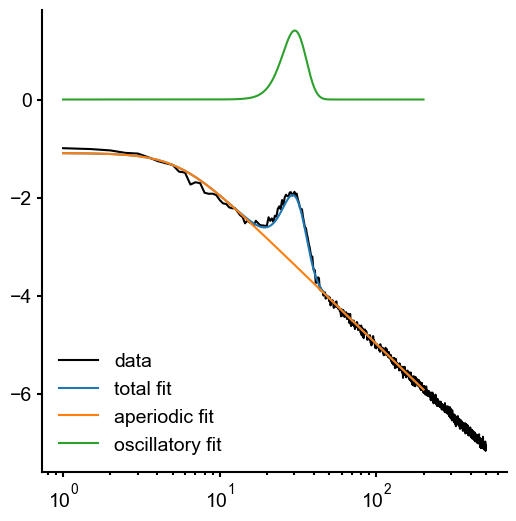

In [8]:
plt.figure(figsize=(6,6))
plt.plot(freqs, np.log10(psd), label='data')
plt.plot(fg.freqs, fg.fooofed_spectrum_, label='total fit')
plt.plot(fg.freqs, fg._ap_fit, label='aperiodic fit')
plt.plot(fg.freqs, fg._peak_fit, label='oscillatory fit')
plt.xscale('log')
plt.legend()

### We can extract the fit paramters in a numpy array for further analyses.

In [9]:
fg.get_results()

FOOOFResults(aperiodic_params=array([  1.20114138, 196.98800287,   3.09442508]), peak_params=array([[30.15132683,  1.40762909, 10.63112129]]), r_squared=0.9975499762726736, error=0.05234838891817401, gaussian_params=array([[30.15132683,  1.40819962,  5.31556065]]))

In [10]:
# Or retrieve by individual component of interest
for p in ['aperiodic_params', 'peak_params', 'gaussian_params', 'error', 'r_squared']:
    print(f"{p}: {fg.get_params(p)}")
    
# # or access via
# [fg.aperiodic_params_, fg.gaussian_params_, fg.error_, fg.r_squared_]

aperiodic_params: [  1.20114138 196.98800287   3.09442508]
peak_params: [[30.15132683  1.40762909 10.63112129]]
gaussian_params: [[30.15132683  1.40819962  5.31556065]]
error: 0.05234838891817401
r_squared: 0.9975499762726736


# 1.bonus We can also start from (simulated) time series.

In [11]:
from neurodsp import sim
from scipy import signal

In [12]:
# Settings for simulation time.
n_seconds = 60
fs = 1000
t_ker=1.

# Exc parameters
n_neurons_E = 1000
firing_rate_E = 1
tau_r_E=0.0
tau_d_E=0.05

# simulating the LFP from just one population
t = np.arange(0,n_seconds, 1/fs)
aperiodic = sim.sim_synaptic_current(n_seconds, fs, n_neurons_E, firing_rate_E, tau_r_E, tau_d_E, t_ker)
periodic = sim.sim_oscillation(n_seconds, fs, 60, 'asine', rdsym=0.75)*0.1 # sprinkle a little oscillation too
lfp = aperiodic + periodic

### Plot the time series and PSD.

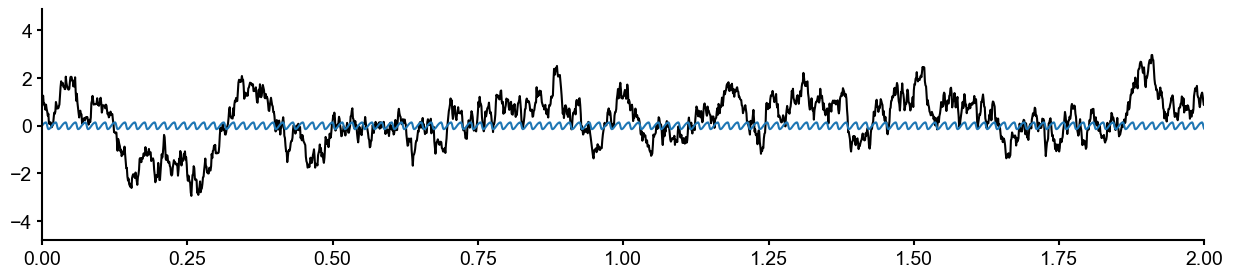

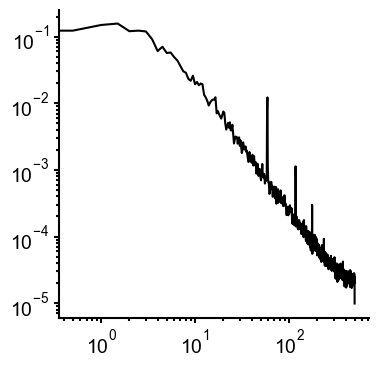

In [13]:
plt.figure(figsize=(15,3))
plt.plot(t,lfp)
plt.plot(t,periodic)
plt.xlim([0,2])

plt.figure()
freqs, psd = signal.welch(lfp, fs=fs, nperseg=fs*2, noverlap=fs, window='hamming')
plt.loglog(freqs, psd)


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  

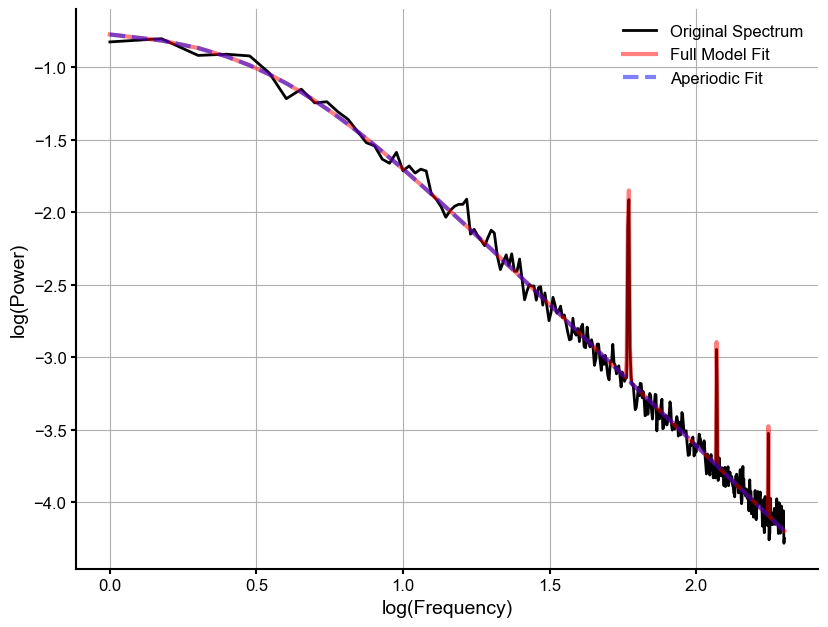

In [14]:
fg = fooof.FOOOF(max_n_peaks=3, min_peak_height=.5, aperiodic_mode='knee')
fg.fit(freqs, psd, freq_range=[1,200])
fg.report(plt_log=True)

---
# 2. Group Object
We can also run fits on many PSDs simultaneously.

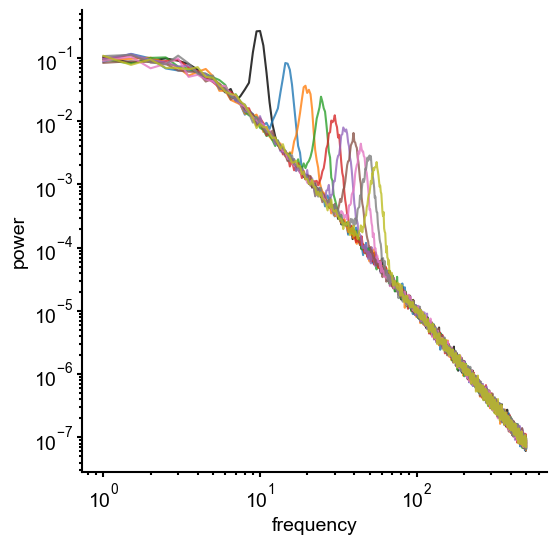

In [15]:
# First generate 10 "channels" of data
f_range = [1,500]
f_res = 0.5
ap_params = [1,100,3]
osc_params = [30,1.5,6]
noise_level = 0.05

psds = []
for osc_freq in np.arange(10,60,5):
    osc_params[0] = osc_freq # Change frequency
    osc_params[2] = osc_freq/10 # Change bandwidth
    freqs, psd = fooof.sim.gen_power_spectrum(f_range, ap_params, osc_params, noise_level, f_res)
    psds.append(psd)
    
psds = np.array(psds)
plt.figure(figsize=(6,6))
plt.loglog(freqs, psds.T, alpha=0.8);
plt.xlabel('frequency'); plt.ylabel('power');

Running FOOOFGroup across 10 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

Running FOOOFGroup across 10 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                       FOOOF - GROUP RESULTS                                      
          

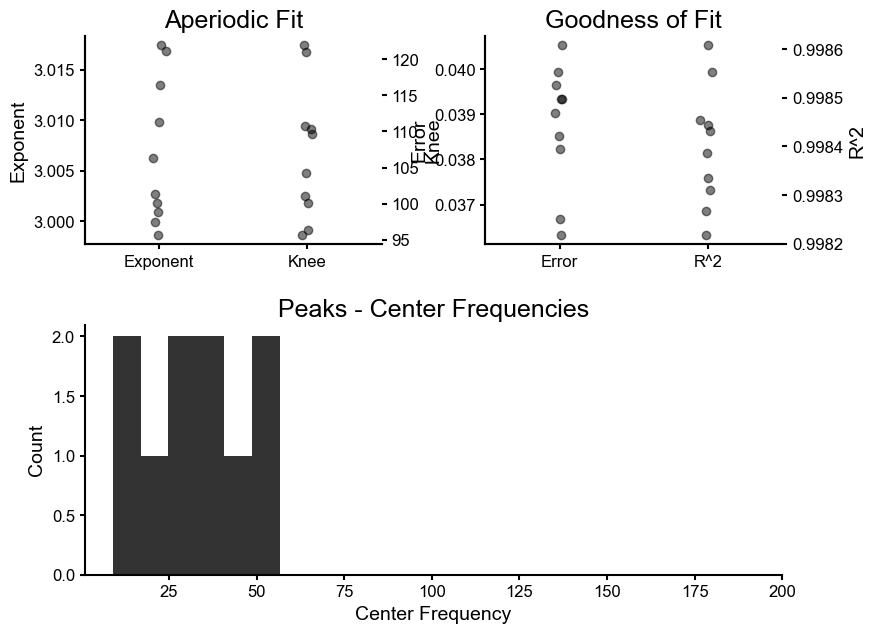

In [16]:
fg = fooof.FOOOFGroup(max_n_peaks=3, min_peak_height=.5, aperiodic_mode='knee')
fg.fit(freqs, psds, freq_range=[1,200])
fg.report()

Retrieving the fits is the same:

In [17]:
print(fg.get_params('aperiodic_params'))

[[  0.99927413  95.68462687   3.00094142]
 [  1.04057425 121.95057212   3.01683054]
 [  0.99867146 104.21151985   2.99990257]
 [  1.03646877 110.32091708   3.01740322]
 [  0.99870088  96.28409564   2.99868968]
 [  1.00529774 100.13514769   3.00180676]
 [  1.02199775 121.05261532   3.00983696]
 [  1.00633142 110.77458724   3.00271621]
 [  1.02603647 101.05434847   3.01345436]
 [  1.01458544 109.58527061   3.0062664 ]]


### Convenience function to return the fits in a pandas Dataframe!

In [18]:
fg.to_df(3)

,offset,knee,exponent,cf_0,pw_0,bw_0,cf_1,pw_1,bw_1,cf_2,pw_2,bw_2,error,r_squared
0,0.999274,95.684627,3.000941,9.966684,1.488260,2.026219,NaN,NaN,NaN,NaN,NaN,NaN,0.040535,0.998267
1,1.040574,121.950572,3.016831,15.017607,1.435762,2.943670,NaN,NaN,NaN,NaN,NaN,NaN,0.039655,0.998218
2,0.998671,104.211520,2.999903,20.018210,1.479921,3.894311,NaN,NaN,NaN,NaN,NaN,NaN,0.039349,0.998311
3,1.036469,110.320917,3.017403,24.957725,1.480629,4.851427,NaN,NaN,NaN,NaN,NaN,NaN,0.039945,0.998335
4,0.998701,96.284096,2.998690,30.011947,1.476563,6.071810,NaN,NaN,NaN,NaN,NaN,NaN,0.038530,0.998453
5,1.005298,100.135148,3.001807,35.049712,1.511430,6.900857,NaN,NaN,NaN,NaN,NaN,NaN,0.038240,0.998444
6,1.021998,121.052615,3.009837,40.009908,1.496052,7.959862,NaN,NaN,NaN,NaN,NaN,NaN,0.036330,0.998608
7,1.006331,110.774587,3.002716,44.900551,1.513584,9.022683,NaN,NaN,NaN,NaN,NaN,NaN,0.039041,0.998431
8,1.026036,101.054348,3.013454,49.997970,1.486349,10.075212,NaN,NaN,NaN,NaN,NaN,NaN,0.039340,0.998386
9,1.014585,109.585271,3.006266,55.204438,1.504444,11.053085,NaN,NaN,NaN,NaN,NaN,NaN,0.036673,0.998553


---
# 3. Hyperparameter exploration
There are some important hyperparameters whose value should depend on what kind of data you have (i.e., what your PSD looks like).

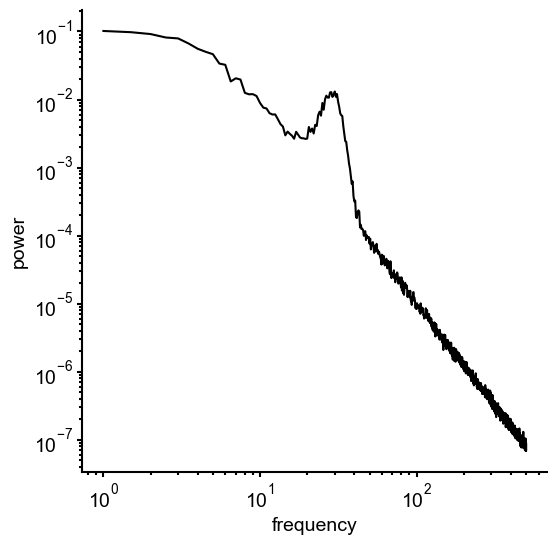

In [19]:
# Load the previous data again
plt.figure(figsize=(6,6))
psd_data = np.load('psd_example.npz')
freqs, psd = psd_data['freqs'], psd_data['psd']
plt.loglog(freqs, psd)
plt.xlabel('frequency'); plt.ylabel('power');

In [20]:
APERIODIC_MODE = 'knee' # Pure power law ('fixed') or Lorentzian ('knee')
PEAK_WIDTH_LIMIT = (0.5, 10) # Acceptable oscillation peak width range
MAX_N_PEAKS = 10 # Max number of peaks to fit
MIN_PEAK_HEIGHT = 1. # Minimum absolute peak height that will be detected
PEAK_THRESHOLD = 1. # Relative threshold for detecting peaks (in terms of noise std)
FIT_RANGE = [1,200] # Frequency range to fit over


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  

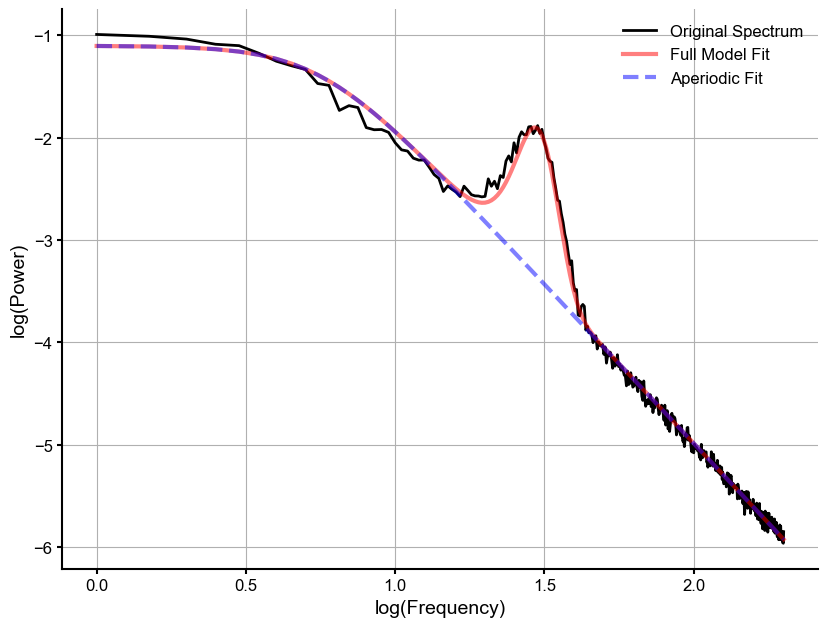

In [21]:
fg = fooof.FOOOF(
    aperiodic_mode=APERIODIC_MODE,
    peak_width_limits=PEAK_WIDTH_LIMIT,
    max_n_peaks=MAX_N_PEAKS,
    min_peak_height=MIN_PEAK_HEIGHT,
    peak_threshold=PEAK_THRESHOLD,
)
fg.fit(freqs, psd, freq_range=FIT_RANGE)
fg.report(plt_log=True)

### Some dope interactive tools for fiddling before fitting final models
- From Ryan Hammonds (PhD student with Brad Voytek at UCSD): https://ryanhammonds.github.io/specparam-rs/simulator.html
- From Michael Valiadis & Farzin Negahbani (PhD students with Alireza Gharabaghi at Uni Tuebingen): https://github.com/Farzin-Negahbani/NeNa_aperiodic_GUI/tree/main